In [1]:
import pylab, random

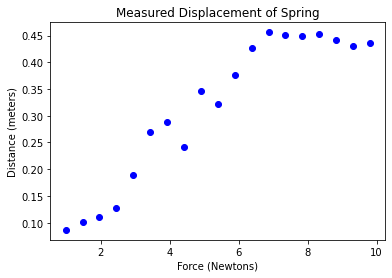

In [2]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')
pylab.show()


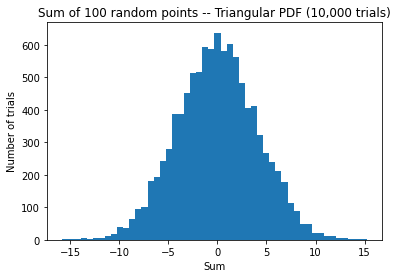

In [6]:
def testErrors(ntrials=10000,npts=100):
    results = [0] * ntrials
    for i in range(ntrials):
        s = 0   # sum of random points
        for j in range(npts):
            s += random.triangular(-1,1)
        results[i] =s
    # plot results in a histogram
    pylab.hist(results,bins=50)
    pylab.title('Sum of 100 random points -- Triangular PDF (10,000 trials)')
    pylab.xlabel('Sum')
    pylab.ylabel('Number of trials')

testErrors()
pylab.show()


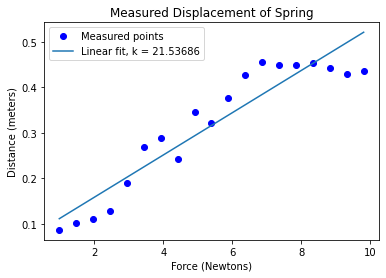

In [8]:
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fit y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')

fitData('springData.txt')
pylab.show()


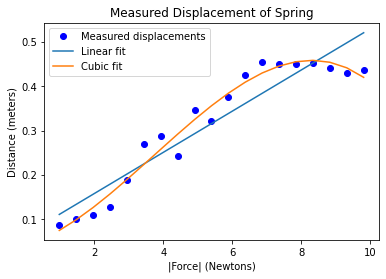

In [9]:
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*xVals + b
    pylab.plot(xVals, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(xVals**3) + b*xVals**2 + c*xVals + d
    pylab.plot(xVals, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

fitData1('springData.txt')
pylab.show()


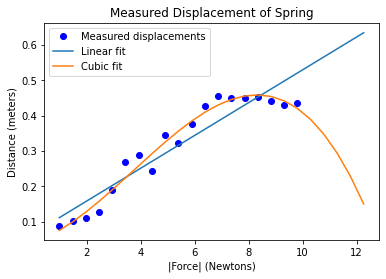

In [10]:
def fitData2(fileName):
    xVals, yVals = getData(fileName)
    extX = pylab.array(xVals + [1.05, 1.1, 1.15, 1.2, 1.25])
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    extX = extX*9.81    # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*extX + b
    pylab.plot(extX, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(extX**3) + b*extX**2 + c*extX + d
    pylab.plot(extX, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

fitData2('springData.txt')
pylab.show()

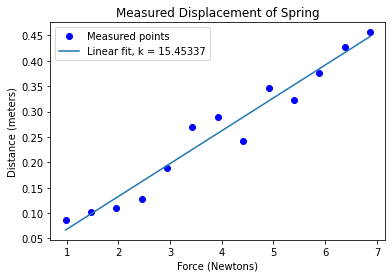

In [11]:
def fitData3(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals[:-6])
    yVals = pylab.array(yVals[:-6])
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fix y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')

fitData3('springData.txt')
pylab.show()


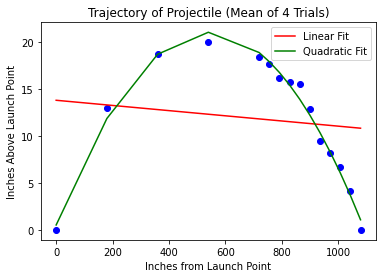

In [13]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def tryFits(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit')
    pylab.legend()

tryFits('launcherData.txt')
pylab.show()


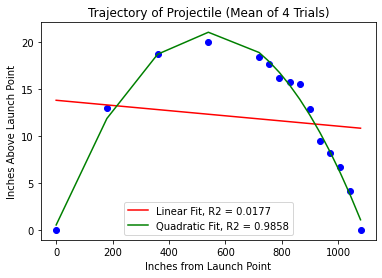

In [14]:
def rSquare(measured, estimated):
    """measured: one dimensional array of measured values
       estimate: one dimensional array of predicted values"""
    SEE = ((estimated - measured)**2).sum()
    mMean = measured.sum()/float(len(measured))
    MV = ((mMean - measured)**2).sum()
    return 1 - SEE/MV


def tryFits1(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a, b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label='Linear Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    a, b, c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label='Quadratic Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    pylab.legend()


tryFits1('launcherData.txt')
pylab.show()